# [기말 프로젝트]

## 주제 : 소셜커머스에서 구매하는 이유는?

## 데이터 : 소셜커머스 2사(쿠팡, 티몬)
        1. 네이버 블로그를 통한 웹 스크래핑
        > 검색어 : 쿠팡득템, 티몬특템, (위메프는 광고성글이 대부분이라 데이터 수집에서 제외함)
        2. 네이버 뉴스를 통한 웹스크래핑
        > 검색어 : 쿠팡, 티몬
        
## 가설
소셜커머스에서 구매하는 이유는 가격이 '저렴'해서 이다.

## 예상되는 결과 
소셜커머스의 탄생 배경이 '딜'에 의해서 책정되는 가격으로 저렴하게 구매할 수 있다!는 것이므로, 이용자들은 득템이라고 느끼는 이유를 '가격'과 관련된 용어로 표현할 것이다.

## 행동 계획
해당업체는 소비자가 구매를 하는 이유를 기반으로 자주 사는 물건 및 반응을 살펴볼 수 있으며,
타유통업계의 경우는 경쟁대상의 경쟁요소를 살펴보는 마케팅 자료로 사용한다.

# [분석 결과 정리]

가설로 세운 소셜커머스에서 구매하는 이유는 가격이 '저렴'해서 이다.는 기각한다!

티몬의 경우 쿠폰, 할인등의 가격과 관련된 용어가 상당수 나오지만, 쿠팡의 경우 '가격'과 관련된 용어가 나오기는 하나, 관계적인 용어가 많이 나온다는 것이 특징이다.

사람들의 인식이 티몬의 경우는 소셜커머스로써 자리매김 한것으로 보이나, 쿠팡의 경우는 소셜커머스보다 11번가, G마켓과 비슷한 온라인 쇼핑 서비스로 인식하고 있는 것으로 보인다.
이러한 사실을 객관적으로 살펴보기 위하여 '쿠팡'을 검색어로 '뉴스'를 스크래핑 해보았음.(2014년 3월~2016년 6월 데이터까지만 수집)예상대로 인터파크, 롯데, 이마트 등이 언급이 되었으며, 이마트의 경우 쿠팡을 경쟁상대로 생각하고 있으며, 이마트는 쿠팡에서 많이 팔리고 있는 '기저귀'로 경쟁구도를 펼치고 있다는 기사를 찾을 수 있었다.
반면, 티몬의 경우는 위메프, 쿠팡(소셜커머스간)간의 경쟁구도를 펼치고 있다.


추가적으로, 쿠팡의 로켓배송으로 사는 상품을 보았더니,
강아지 사료, 아기 기저귀가 있었다. 강아지나 아기나 집에서 '아기'로 불리우며, 소중한 존재로 다뤄지는데
이들에겐 항상 급하게 전달이 되어야 하는것이 강아지에겐 사료이고, 아기에겐 기저귀인가 보다.

In [65]:
import requests
import operator
import lxml.html
import csv
import numpy#단어들이 
from konlpy.tag import Twitter
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from matplotlib import pyplot
import networkx#상관관계 시각화를 위한 
from gensim.matutils import Sparse2Corpus # gensim
from gensim.models.ldamodel import LdaModel

In [66]:
%matplotlib inline
tagger = Twitter()

In [67]:
def extract(url, path):
    res = requests.get(url)
    res.encoding = 'utf-8'
    root = lxml.html.fromstring(res.text)
    return root.xpath(path)

def filter_content(cons):
    return 0

# 뉴스 스크래핑

In [108]:
check = '티몬기간'
if(check == "티몬기간"):
    CSV_FILE_NAME = 'news_tm.csv' #티몬 뉴스
    url = 'http://news.naver.com/main/search/search.nhn?query=%C6%BC%B8%F3&st=news.all&q_enc=EUC-KR&r_enc=UTF-8&r_format=xml&rp=none&sm=all.basic&ic=all&so=rel.dsc&rcnews=exist:&stDate=range:20140301:20160607&detail=0&pd=4&r_cluster2_start=11&r_cluster2_display=10&start=11&display=5&startDate=2014-03-01&endDate=2016-06-07&page={}'
    exclude = ['티몬','뉴스', '상품', '판매', '무단', '배포', '금지','기자', '때문','위해','지난해']
elif(check == "쿠팡_쿠팡맨후"):
    CSV_FILE_NAME = 'news_coupang.csv'   # 쿠팡 (쿠팡맨 후) 뉴스 읽기
    url = 'http://news.naver.com/main/search/search.nhn?query=%C4%ED%C6%CE&st=news.all&q_enc=EUC-KR&r_enc=UTF-8&r_format=xml&rp=none&sm=all.basic&ic=all&so=rel.dsc&rcnews=exist:&stDate=range:20140301:20160607&detail=0&pd=4&r_cluster2_start=11&r_cluster2_display=10&start=11&display=5&startDate=2014-03-01&endDate=2016-06-07&page={}'
    exclude = ['쿠팡','뉴스', '상품', '판매', '무단', '배포', '금지','기자', '때문','위해','지난해']
elif(check == "티몬과쿠팡"):
    CSV_FILE_NAME = 'news_tm_and_coupang.csv'   # 티몬 & 쿠팡 뉴스 읽기
    #url = 'http://news.naver.com/main/search/search.nhn?query=%C4%ED%C6%CE&st=news.all&q_enc=EUC-KR&r_enc=UTF-8&r_format=xml&rp=none&sm=all.basic&ic=all&so=rel.dsc&rcnews=exist:&stDate=range:20140301:20160607&detail=0&pd=4&r_cluster2_start=11&r_cluster2_display=10&start=11&display=5&startDate=2014-03-01&endDate=2016-06-07&page={}'
    exclude = ['티몬','쿠팡','뉴스', '상품', '판매', '무단', '배포', '금지','기자', '때문','위해','지난해']

In [ ]:
with open(CSV_FILE_NAME, 'w', encoding='utf8') as f:
    writer = csv.writer(f)
    for i in range(1, 50):
        res = requests.get(url.format(i))  # 기사 목록
        element = lxml.html.fromstring(res.text)
        for news_link in element.xpath('.//a[@class="go_naver"]'):
            try:
                res = requests.get(news_link.attrib['href'])   # 네이버 뉴스 링크
                news = lxml.html.fromstring(res.text)
                body = news.xpath('.//div[@id="articleBodyContents"]')[0]
                writer.writerow([body.text_content()])
            except:
                continue

# 블로그 스크래핑

In [83]:
query_page_num = [50]

check = '득템'
if(check == '쿠팡득템'):
    CSV_FILE_NAME = 'blog_copuang_getitem.csv'
    query = ['%EC%BF%A0%ED%8C%A1%EB%93%9D%ED%85%9CD%85%9C']
    exclude = ['득템', '쿠팡', '사진','구매', '구입',  '때문', '포스팅', '상품', '제품', '크기','이웃', '폰트', '크게', '공유', '보기', '추가', '본문', '진짜','정말', '너무', '그냥', '완전','공감','복사','조정','기능','기타'] 
    #  '로켓','배송', '택배', '할인'
    query_page_num = [20]
elif(check == '티몬득템'):
    CSV_FILE_NAME = 'blog_ticketmonster_getitem.csv'
    query = ['%ED%8B%B0%EB%AA%AC%EB%93%9D%ED%85%9C'] 
    exclude = ['득템','티몬','꿀딜', '구매', '구입',  '때문', '포스팅','상품', '제품', '크기','이웃', '폰트', '크게', '공유', '보기', '추가', '본문', '진짜','정말', '너무', '그냥', '완전','공감','복사','조정','기능','기타'] 
    # '택배', '할인',
    #'만원', '천원', '이벤트','저렴','카드', '페이', '결제', '행사', '세일', '혜택', '가격','쿠폰' <-- 저렴하게 살 수 있는 수단들..
    query_page_num = [20]
elif(check=='쿠팡과티몬득템'):
    CSV_FILE_NAME = 'blog_tm_and_coupang_getitem.csv'
    #query = ['%ED%8B%B0%EB%AA%AC%EB%93%9D%ED%85%9C'] 
    exclude = ['득템','쿠팡', '티몬','꿀딜', '사진','구매', '구입',  '때문', '포스팅','상품', '제품', '크기','이웃', '폰트', '크게', '공유', '보기', '추가', '본문', '진짜','정말', '너무', '그냥', '완전','공감','복사','조정','기능','기타'] 
    # '택배', '할인',
    #'만원', '천원', '이벤트','저렴','카드', '페이', '결제', '행사', '세일', '혜택', '가격','쿠폰' <-- 저렴하게 살 수 있는 수단들..
    query_page_num = [20]
elif(check == '쿠팡로켓배송'):
    CSV_FILE_NAME = 'blog_copuang_rocket.csv'
    query = ['%EC%BF%A0%ED%8C%A1+%EB%A1%9C%EC%BC%93%EB%B0%B0%EC%86%A1'] 
    exclude = ['로켓', '배송', '쿠팡', '구매', '구입', '택배', '할인', '때문', '포스팅', '상품', '제품', '크기','이웃', '폰트', '크게', '공유', '보기', '추가', '본문', '진짜','정말', '너무', '그냥', '완전','공감','복사','조정','기능','기타'] 
    query_page_num = [20]
elif(check == '득템'):
    CSV_FILE_NAME = 'blog_getitem.csv'
    query = ['%EB%93%9D%ED%85%9C'] # 득템
    exclude = ['득템','제품','구매', '구입','사실', '때문','크기', '이웃', '폰트', '크게', '공유', '보기', '추가', '본문', '진짜','정말',  '너무', '그냥', '완전','공감','복사','조정','기능','기타'] 
   
print(exclude[0], exclude[1])
scrapying_index = 0

득템 제품


In [276]:
import csv
count = 0
write_count = 0
news = []
rc = 0

asso_query_i=0
with open(CSV_FILE_NAME, 'w', encoding='utf8') as f: 
    w = csv.writer(f)
    for asso_query_i in range(scrapying_index,len(query)):   
        for page in range(1, 15*query_page_num[asso_query_i], 15): 
            page_url ='http://m.search.naver.com/search.naver?where=m_blog&sm=mtb_pge&query='+query[asso_query_i]+'&display=15&st=sim&date_option=-1' + '&start={}'.format(page) + '&open_option=0'
            for node in extract(page_url, './/li[@class="api_bx"]/a'):
                try:
                    url = node.attrib['href']
                    res = requests.get(url, headers={'referer': 'https://search.naver.com/search.naver?query=1'})
                    element = lxml.html.fromstring(res.text)
                    element.xpath('.//div[@id="viewTypeSelector"]')
                    content = element.find('.//div[@id="viewTypeSelector"]').text_content()
                    #print(content)
                    count= count+1
                    rc = filter_content(content)
                    write_count = write_count+1
                    w.writerow([content])
                    else :
                        print(url)
                except:
                    continue
print(count, write_count)

291 291


# [스크래핑된 내용 읽어오기]

# 파일 읽기

In [109]:
news = []
with open(CSV_FILE_NAME, encoding='utf8', newline='\r\n') as f:
    reader = csv.reader(f)
    for row in reader:
        news.append(row[0])

# TDM만들기(한 단어 + 중복단어) 빼기

In [110]:
#한글자 단어를 싹빼버림
print(exclude)
def get_word(doc):
    nouns = tagger.nouns(doc)
    return [noun for noun in nouns if len(noun) > 1 and noun not in exclude]

['티몬', '뉴스', '상품', '판매', '무단', '배포', '금지', '기자', '때문', '위해', '지난해']


In [111]:
cv = CountVectorizer(tokenizer=get_word, max_features=50)
tdf = cv.fit_transform(news)
words = cv.get_feature_names()

# 단어별 출현 빈도

In [112]:
count_mat = tdf.sum(axis=0)#0 :열합계, 1: 행합계
count = numpy.squeeze(numpy.asarray(count_mat))  
word_count = list(zip(words, count))

In [113]:
s = sorted(word_count, key=operator.itemgetter(1), reverse=True)#0 : 단어순으로 정렬, 1: 사용빈도수로 정렬, reverse=TRUE(내림차순)
s[0:10]

[('매출', 1125),
 ('고객', 1006),
 ('만원', 950),
 ('서비스', 948),
 ('쿠폰', 883),
 ('구매', 768),
 ('할인', 707),
 ('소셜커머스', 681),
 ('억원', 606),
 ('통해', 568)]

# '득템' 이란? 블로그 -  워드클라우드 + 네트워크 시각화 + 토픽분석

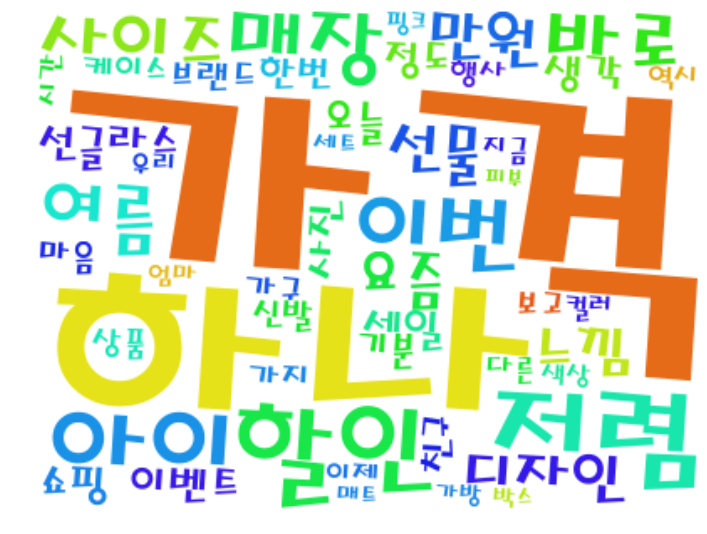

In [88]:
wc = WordCloud(font_path='C:\\Windows\\Fonts\\HMKMMAG.TTF', background_color='white', width=400, height=300)
cloud = wc.generate_from_frequencies(word_count)


pyplot.figure(figsize=(12, 9))#inch단위로 크기를 줌
pyplot.imshow(cloud)#단어를 화면에 그려라
pyplot.axis("off")#그래프의 축을 그리지 말고
pyplot.show() #화면에 뿌려라

[분석]
1. '득템'은 가격적인 측면만이 큰 부분을 차지하고 있다.
2. 또한 대부분 '만원'정도의 추가적인 할인을 받은 경우, 큰 만족감을 갖게 됨.

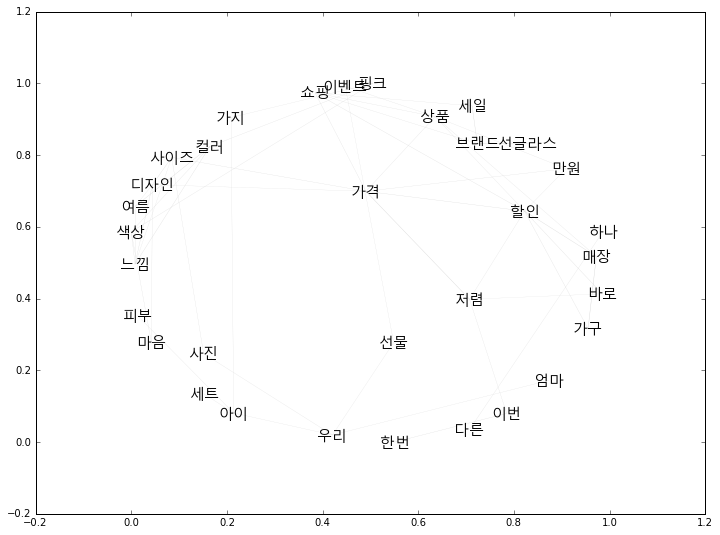

In [89]:
word_corr = numpy.corrcoef(tdf.todense(), rowvar=0)
edges = []
for i in range(len(words)):
    for j in range(i + 1, len(words)):
        edges.append((words[i], words[j], word_corr[i, j]))
        
edges = sorted(edges, key=operator.itemgetter(2), reverse=True)
edges = edges[:50]    #단어쌍중에 상관이 높은 50개만 출력함
edge_list = [(word1, word2) for word1, word2, weight in edges]#단어쌍만 새로 만듬
weight_list = [weight for word1, word2, weight in edges]#상관계수만 따로 뽑음

G = networkx.Graph()  
edge_set = set()
for word1, word2, weight in edges:
    G.add_edge(word1, word2, weight=weight)#weight = 상관계수
    edge_set.add((word1, word2))
    
position = networkx.spring_layout(G, iterations=30)
pyplot.figure(figsize=(12, 9))
networkx.draw_networkx_nodes(G, position, node_size=0)
networkx.draw_networkx_edges(G, position, edgelist=edge_list, width=weight_list, edge_color='lightgray')#상관계수가 클 수록 두껍게 그려주겠다.
labels = networkx.draw_networkx_labels(G, position, font_size=15, font_family='Malgun Gothic')

[분석]
1. '득템'은 가격적인 측면만도 있으며, 마음에 드는 사이즈, 컬러, 디자인에도 잘 구매했다라는 느낌을 갖게 된다. 
2. 또한 대부분 '만원'정도의 추가적인 할인을 받은 경우, 큰 만족감을 갖게 된다.
3. '득템'이라고 느끼는 순간 "바로" 구매를 하는 소비자의 행동을 엿볼 수 있다.
4. 여름에는 주로 선그라스를 득템하게 된다.
5. 득템을 하게 되면 주로 "엄마"가 생각나고, 엄마 선물로 이어지는 모습을 볼 수 있다.

In [90]:
corpus = Sparse2Corpus(tdf.T) 
lda = LdaModel(corpus=corpus, num_topics=20, id2word=dict(enumerate(words)),iterations= 200) 

In [91]:
lda.show_topic(0) 

[('가격', 0.096632677995123442),
 ('아이', 0.070860873567216001),
 ('할인', 0.053537487111080632),
 ('가구', 0.050696045960601996),
 ('저렴', 0.033173825492682829),
 ('하나', 0.032226678447684939),
 ('만원', 0.031753104915508777),
 ('사진', 0.029385237284240969),
 ('선물', 0.027490943187158712),
 ('이번', 0.027216565192788096)]

In [92]:
lda.show_topic(1) 

[('저렴', 0.10900293910400058),
 ('가격', 0.061376091861381842),
 ('이번', 0.052128797263635861),
 ('할인', 0.048294061418129683),
 ('만원', 0.04314272885658843),
 ('박스', 0.041666760163970612),
 ('하나', 0.041230634065005434),
 ('오늘', 0.03836735818344908),
 ('바로', 0.037614199580750289),
 ('시간', 0.028857340870055214)]

In [93]:
lda.show_topic(2) 

[('가구', 0.096882690654192513),
 ('케이스', 0.082116488860413492),
 ('가격', 0.075553732541061625),
 ('디자인', 0.067350287095421027),
 ('사이즈', 0.047662018041577943),
 ('저렴', 0.047662018035985514),
 ('할인', 0.046021328953773623),
 ('이벤트', 0.041099261674618803),
 ('행사', 0.032895816202839837),
 ('가지', 0.026333059859069988)]

In [94]:
lda.show_topic(3) 

[('쇼핑', 0.10613668045556936),
 ('선글라스', 0.081032077959365581),
 ('가격', 0.072663877234617064),
 ('여름', 0.058716875781408551),
 ('할인', 0.050348674993824699),
 ('박스', 0.039191073835987092),
 ('저렴', 0.03640167364474399),
 ('만원', 0.03640167363335594),
 ('상품', 0.036401673591455963),
 ('케이스', 0.028033472777127397)]

In [95]:
lda.show_topic(4) 

[('행사', 0.10816864279974213),
 ('매장', 0.079183135608979785),
 ('할인', 0.07654808952610466),
 ('가구', 0.055467720622690606),
 ('한번', 0.042292490083973427),
 ('이제', 0.039657443951067892),
 ('저렴', 0.03702239790872347),
 ('요즘', 0.034387351762482116),
 ('정도', 0.034387351758815562),
 ('선물', 0.034387351738907966)]

# '쿠팡득템' 블로그 - 워드 클라우드 + 네트워크 시각화 + 토픽분석

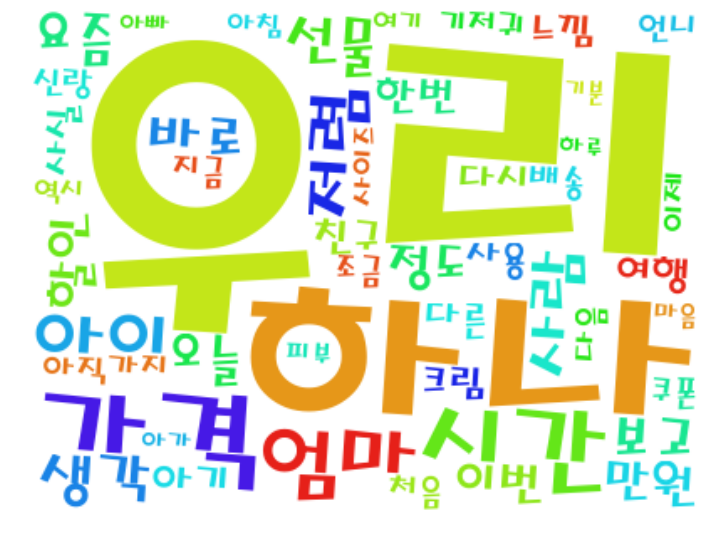

In [342]:
wc = WordCloud(font_path='C:\\Windows\\Fonts\\HMKMMAG.TTF', background_color='white', width=400, height=300)
cloud = wc.generate_from_frequencies(word_count)


pyplot.figure(figsize=(12, 9))#inch단위로 크기를 줌
pyplot.imshow(cloud)#단어를 화면에 그려라
pyplot.axis("off")#그래프의 축을 그리지 말고
pyplot.show() #화면에 뿌려라

[분석]
1. 쿠팡의 경우 '가격'과 관련된 용어가 나오기는 하나, 관계적인 용어가 많이 나온다는 것이 특징임. 엄마, 신랑, 아기, 언니.. 또한 기저귀, 여행, 선물등을 쿠팡을 통해서 많이 구매하는 것을 알 수 있음. 

2. '만원'정도의 할인을 추가적으로 받은 경우, 큰 만족감을 갖게 됨.

3. 쿠팡은 소셜커머스의 측면보다는 온라인 쇼핑몰의 인식을 더 가지고 있다고 볼 수 있음.

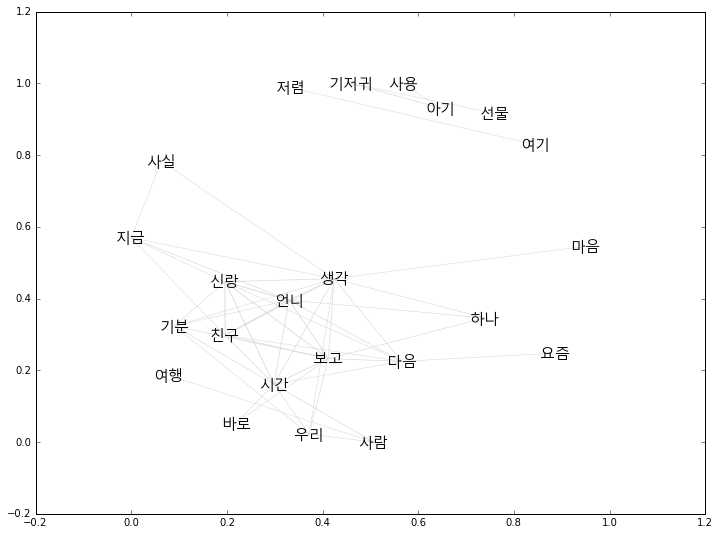

In [355]:
word_corr = numpy.corrcoef(tdf.todense(), rowvar=0)
edges = []
for i in range(len(words)):
    for j in range(i + 1, len(words)):
        edges.append((words[i], words[j], word_corr[i, j]))
        
edges = sorted(edges, key=operator.itemgetter(2), reverse=True)
edges = edges[:50]    #단어쌍중에 상관이 높은 50개만 출력함
edge_list = [(word1, word2) for word1, word2, weight in edges]#단어쌍만 새로 만듬
weight_list = [weight for word1, word2, weight in edges]#상관계수만 따로 뽑음

G = networkx.Graph()  
edge_set = set()
for word1, word2, weight in edges:
    G.add_edge(word1, word2, weight=weight)#weight = 상관계수
    edge_set.add((word1, word2))
    
position = networkx.spring_layout(G, iterations=30)
pyplot.figure(figsize=(12, 9))
networkx.draw_networkx_nodes(G, position, node_size=0)
networkx.draw_networkx_edges(G, position, edgelist=edge_list, width=weight_list, edge_color='lightgray')#상관계수가 클 수록 두껍게 그려주겠다.
labels = networkx.draw_networkx_labels(G, position, font_size=15, font_family='Malgun Gothic')

[분석]
1. 쿠팡의 경우 '가격'과 관련된 용어가 나오기는 하나, 관계적인 용어가 많이 나온다는 것이 특징이며, 관계성에는 "여행" 이 자리잡고 있다.
2. '득템'이라고 느끼는 순간 "지금", "바로" 구매를 하는 즉시적 행동을 하게 된다.
3. 쿠팡을 통해서는 여행 및 기저귀를 많이 구매하고 있다. 
4. 쿠팡은 소셜커머스의 측면보다는 온라인 쇼핑몰의 인식을 더 가지고 있다고 볼 수 있음.

# '티몬득템' 블로그 - 워드 클라우드 + 네트워크 시각화 

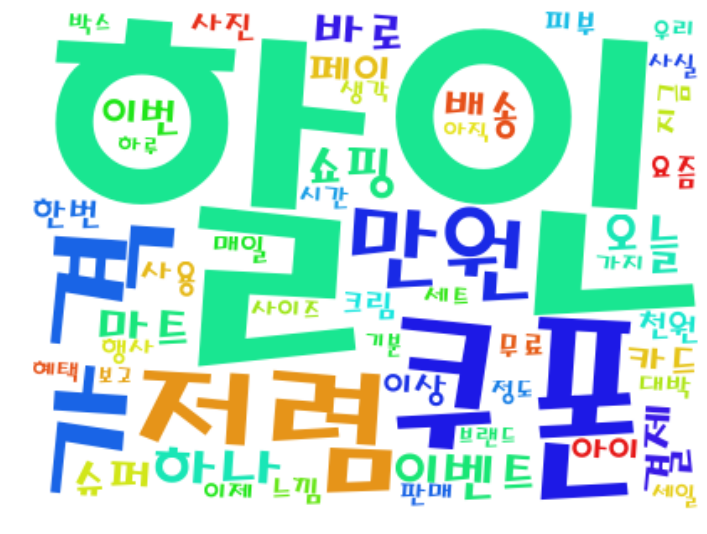

In [362]:
wc = WordCloud(font_path='C:\\Windows\\Fonts\\HMKMMAG.TTF', background_color='white', width=400, height=300)
cloud = wc.generate_from_frequencies(word_count)


pyplot.figure(figsize=(12, 9))#inch단위로 크기를 줌
pyplot.imshow(cloud)#단어를 화면에 그려라
pyplot.axis("off")#그래프의 축을 그리지 말고
pyplot.show() #화면에 뿌려라

[분석] 
1. 티몬의 경우 쿠폰, 할인등의 가격과 관련된 용어가 상당수 나오는 것으로 보아 '소셜커머스'라는 인식으로 자리매김 하였다고 볼 수 있다.
2. 티몬도 동일하게 '천원' 또는 '만원'정도의 할인을 추가적으로 받은 경우, 소비자들은 큰 만족감을 갖게 됨

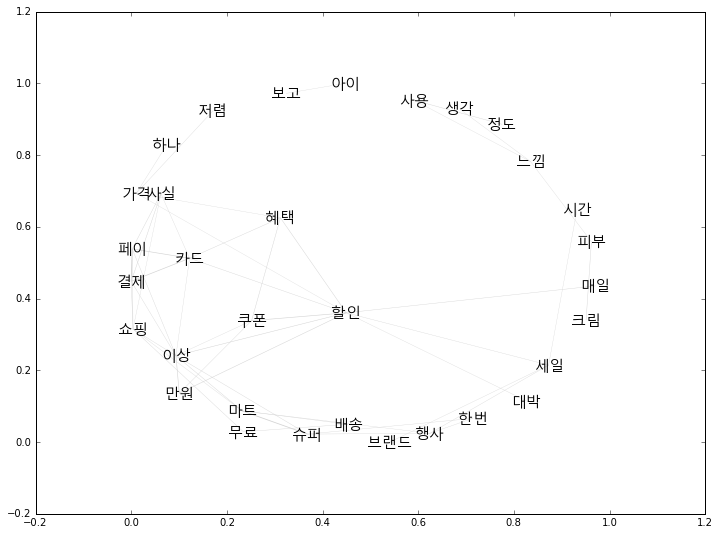

In [365]:
word_corr = numpy.corrcoef(tdf.todense(), rowvar=0)
edges = []
for i in range(len(words)):
    for j in range(i + 1, len(words)):
        edges.append((words[i], words[j], word_corr[i, j]))
        
edges = sorted(edges, key=operator.itemgetter(2), reverse=True)
edges = edges[:50]    
edge_list = [(word1, word2) for word1, word2, weight in edges]
weight_list = [weight for word1, word2, weight in edges]

G = networkx.Graph()  
edge_set = set()
for word1, word2, weight in edges:
    G.add_edge(word1, word2, weight=weight)#weight = 상관계수
    edge_set.add((word1, word2))
    
position = networkx.spring_layout(G, iterations=30)
pyplot.figure(figsize=(12, 9))
networkx.draw_networkx_nodes(G, position, node_size=0)
networkx.draw_networkx_edges(G, position, edgelist=edge_list, width=weight_list, edge_color='lightgray')#상관계수가 클 수록 두껍게 그려주겠다.
labels = networkx.draw_networkx_labels(G, position, font_size=15, font_family='Malgun Gothic')

[분석] 
1. 티몬의 경우 쿠폰, 할인등의 가격과 관련된 용어가 상당수 나오는것으로 보아 '소셜커머스'라는 인식으로 소비자들에게 다가가고 있다.
2. 핀테크 관련 결제수단을 사용하여 이루어지는 할인혜택을 받고 있고, 그로 인해 소비 및 만족감이 증가하고 있다.
3. 티몬이 전략적으로 밀고 있는 것중에 '슈퍼마트'가 있는데, 이에 대한 인식도 자리매김했다고 볼 수 있다.
4. 티몬에서는 피부에 바르는 크림을 많이 세일하고, 소비자들은 구매를 많이 하고 만족감도 높게 나타나고 있다.

# 쿠팡 & 티몬 블로그 - 워드 클라우드 + 네트워크 시각화

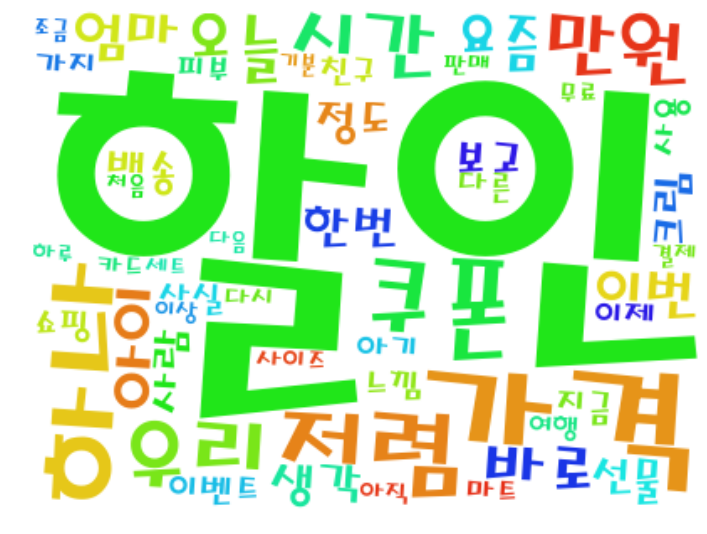

In [50]:
wc = WordCloud(font_path='C:\\Windows\\Fonts\\HMKMMAG.TTF', background_color='white', width=400, height=300)
cloud = wc.generate_from_frequencies(word_count)


pyplot.figure(figsize=(12, 9))#inch단위로 크기를 줌
pyplot.imshow(cloud)#단어를 화면에 그려라
pyplot.axis("off")#그래프의 축을 그리지 말고
pyplot.show() #화면에 뿌려라

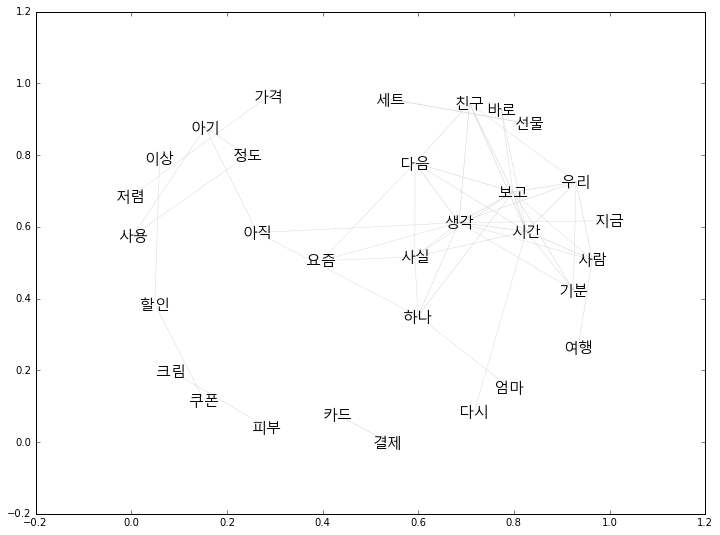

In [51]:
word_corr = numpy.corrcoef(tdf.todense(), rowvar=0)
edges = []
for i in range(len(words)):
    for j in range(i + 1, len(words)):
        edges.append((words[i], words[j], word_corr[i, j]))
        
edges = sorted(edges, key=operator.itemgetter(2), reverse=True)
edges = edges[:50]    
edge_list = [(word1, word2) for word1, word2, weight in edges]
weight_list = [weight for word1, word2, weight in edges]

G = networkx.Graph()  
edge_set = set()
for word1, word2, weight in edges:
    G.add_edge(word1, word2, weight=weight)#weight = 상관계수
    edge_set.add((word1, word2))
    
position = networkx.spring_layout(G, iterations=30)
pyplot.figure(figsize=(12, 9))
networkx.draw_networkx_nodes(G, position, node_size=0)
networkx.draw_networkx_edges(G, position, edgelist=edge_list, width=weight_list, edge_color='lightgray')#상관계수가 클 수록 두껍게 그려주겠다.
labels = networkx.draw_networkx_labels(G, position, font_size=15, font_family='Malgun Gothic')

# 쿠팡 뉴스 검색 - 워드 클라우드 + 네트워크 시각화 + 토픽분석

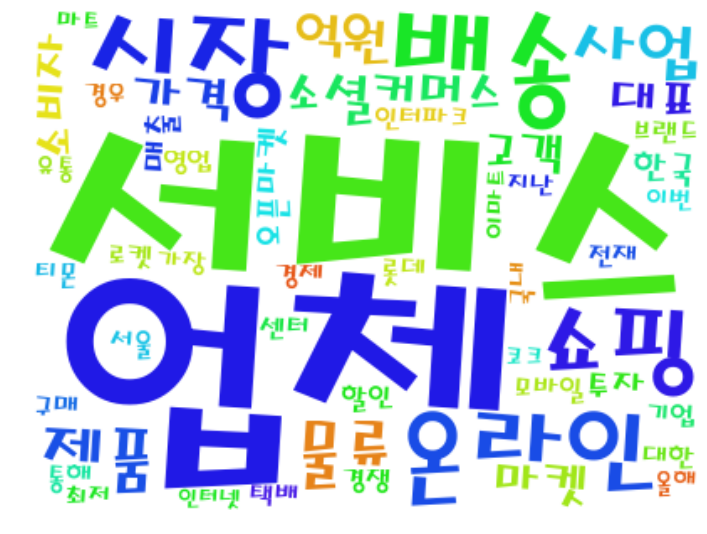

In [388]:
wc = WordCloud(font_path='C:\\Windows\\Fonts\\HMKMMAG.TTF', background_color='white', width=400, height=300)
cloud = wc.generate_from_frequencies(word_count)


pyplot.figure(figsize=(12, 9))#inch단위로 크기를 줌
pyplot.imshow(cloud)#단어를 화면에 그려라
pyplot.axis("off")#그래프의 축을 그리지 말고
pyplot.show() #화면에 뿌려라

[분석]
1. 쿠팡은 회사의 "매출"보다는 "서비스"가 강조된 마케팅을 펼치고 있다고 할 수 있다.
2. 쿠팡의 경우는 소셜커머스보다 11번가, G마켓과 비슷한 "온라인 마켓"으로 소비자들에게 다가가고 있다. 
3. 쿠팡과 함께 언급되는 회사로는 "티몬", "위메프"와 같은 소셜커머스가 아니라 인터파크, 롯데, 이마트같은 "온오프라인 마켓"이 언급되고 있다.

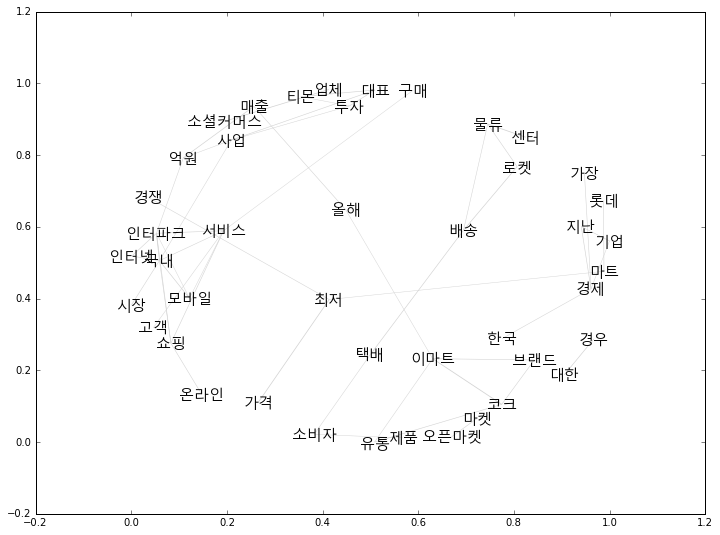

In [107]:
word_corr = numpy.corrcoef(tdf.todense(), rowvar=0)
edges = []
for i in range(len(words)):
    for j in range(i + 1, len(words)):
        edges.append((words[i], words[j], word_corr[i, j]))
        
edges = sorted(edges, key=operator.itemgetter(2), reverse=True)
edges = edges[:50]    
edge_list = [(word1, word2) for word1, word2, weight in edges]
weight_list = [weight for word1, word2, weight in edges]

G = networkx.Graph()  
edge_set = set()
for word1, word2, weight in edges:
    G.add_edge(word1, word2, weight=weight)#weight = 상관계수
    edge_set.add((word1, word2))
    
position = networkx.spring_layout(G, iterations=30)
pyplot.figure(figsize=(12, 9))
networkx.draw_networkx_nodes(G, position, node_size=0)
networkx.draw_networkx_edges(G, position, edgelist=edge_list, width=weight_list, edge_color='lightgray')#상관계수가 클 수록 두껍게 그려주겠다.
labels = networkx.draw_networkx_labels(G, position, font_size=15, font_family='Malgun Gothic')

[분석]

1. 쿠팡을 '경쟁'상대로 생각하고 있는 회사는 롯데와 이마트 이며, 이마트의 경우 쿠팡에서 많이 팔리고 있는 '기저귀'로 경쟁구도를 펼치고 있다는 기사를 찾을 수 있었음. 
2. 쿠팡은 투자를 받아 운영되고 있고, 로켓배송등의 서비스로 인해 소비자의 인식도 좋은 편이라고 할 수있다.
3. 인터파크와 관계성을 갖는 그림은 근래에 인터파크와 제휴서비스를 소비자들에게 제공해주고 있다

In [422]:
corpus = Sparse2Corpus(tdf.T) 
lda = LdaModel(corpus=corpus, num_topics=20, id2word=dict(enumerate(words)),iterations= 200) 

In [423]:
lda.show_topic(0) 

[('시장', 0.11039323344267912),
 ('쇼핑', 0.07122484489117635),
 ('서비스', 0.068496328127812645),
 ('대표', 0.067034956707831245),
 ('투자', 0.060387636314188163),
 ('온라인', 0.05406223167080039),
 ('사업', 0.05313173574042937),
 ('경쟁', 0.037208694564809242),
 ('억원', 0.034956515312896529),
 ('한국', 0.033268897087797795)]

In [424]:
lda.show_topic(1) # 인터파크와 제휴서비스

[('인터파크', 0.072458449488661716),
 ('억원', 0.059474533603802088),
 ('쇼핑', 0.05264465069655231),
 ('인터넷', 0.045529183503803056),
 ('가격', 0.043273827212362545),
 ('서비스', 0.039782663727466132),
 ('시장', 0.038577485665498547),
 ('매출', 0.034849418200237472),
 ('사업', 0.034831315303131237),
 ('업체', 0.030645647164578942)]

In [425]:
lda.show_topic(2)

[('업체', 0.14888325281362566),
 ('물류', 0.077303052104457162),
 ('센터', 0.075301616012068875),
 ('소셜커머스', 0.068953545074320249),
 ('모바일', 0.055078189887597384),
 ('제품', 0.033786291537763198),
 ('기업', 0.032320865444701967),
 ('경우', 0.026609070625434415),
 ('올해', 0.026553818465414079),
 ('매출', 0.025274837816084916)]

In [426]:
lda.show_topic(3)

[('최저', 0.093665514486595491),
 ('가격', 0.091793140387119471),
 ('마트', 0.057154219492461633),
 ('경쟁', 0.05560679236916756),
 ('업체', 0.047186105165812994),
 ('소셜커머스', 0.044969575268406371),
 ('티몬', 0.044089710818646134),
 ('소비자', 0.044047600771657536),
 ('경제', 0.044040136767855932),
 ('가장', 0.043041363536057427)]

In [427]:
lda.show_topic(4) # 이마트 vs 쿠팡, 최저가 출혈경쟁

[('코크', 0.10022666095356972),
 ('브랜드', 0.097202329813444982),
 ('이마트', 0.084862512346554911),
 ('제품', 0.063804222286056575),
 ('유통', 0.046699323812852883),
 ('매출', 0.042512589437594145),
 ('억원', 0.041424416835403974),
 ('롯데', 0.038280424660296263),
 ('온라인', 0.032554519170286317),
 ('통해', 0.02976612939898542)]

In [428]:
lda.show_topic(5)

[('통해', 0.095575945696981329),
 ('이번', 0.088963729240066791),
 ('할인', 0.067704382466596408),
 ('대표', 0.060308281899785265),
 ('제품', 0.053500394406116536),
 ('구매', 0.050933390693054241),
 ('가격', 0.046429625898845028),
 ('온라인', 0.043331749343834207),
 ('전재', 0.041478959728928129),
 ('소셜커머스', 0.033005605576945166)]

# 티몬 뉴스 검색 - 워드 클라우드 + 네트워크 시각화 + 토픽분석

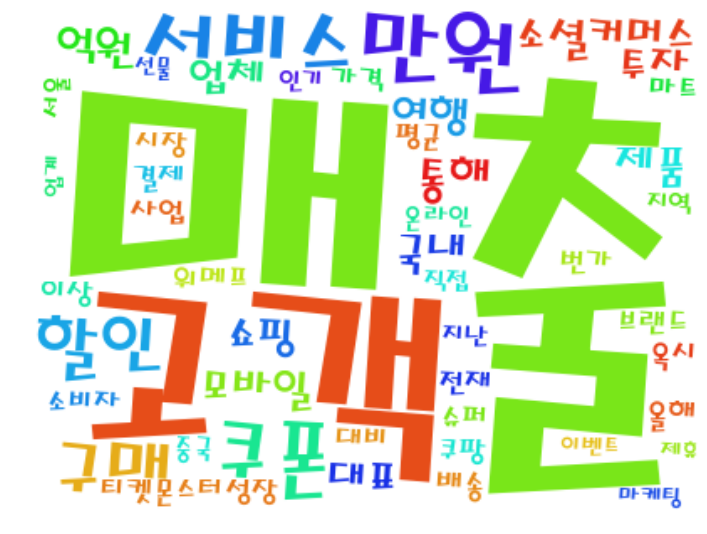

In [114]:
wc = WordCloud(font_path='C:\\Windows\\Fonts\\HMKMMAG.TTF', background_color='white', width=400, height=300)
cloud = wc.generate_from_frequencies(word_count)


pyplot.figure(figsize=(12, 9))#inch단위로 크기를 줌
pyplot.imshow(cloud)#단어를 화면에 그려라
pyplot.axis("off")#그래프의 축을 그리지 말고
pyplot.show() #화면에 뿌려라

[분석]
1. 언론을 통해본 티몬의 경우는 "서비스"보다는 "매출"적인 측면이 강하게 언급되고 있다.
2. 기사를 통해서 보면, 티몬에서 인기있게 팔리는 제품이 "여행"이다.그러나, 블로그를 통해서 수집된 정보를 보면 '여행'은 주로 쿠팡을 통해서 구매가 이루어지고 있음을 알 수 있다. 기사를 통해서 보여지는 내용과 실제 구매가 이뤄지는것과는 차이가 있다. 

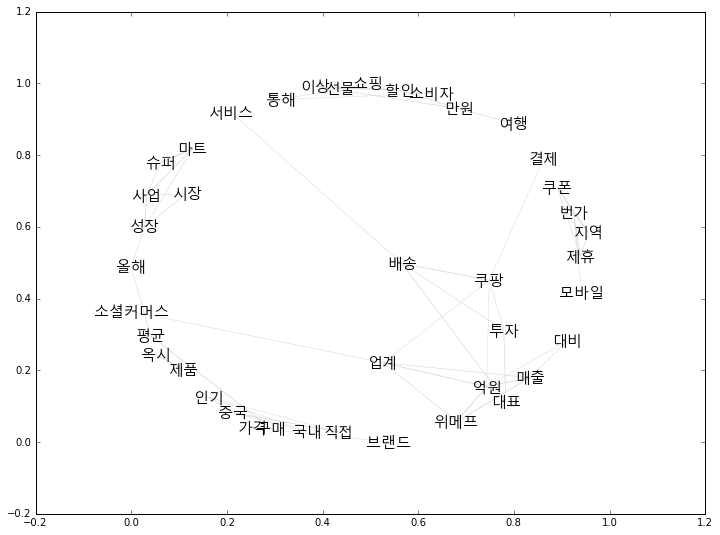

In [440]:
word_corr = numpy.corrcoef(tdf.todense(), rowvar=0)
edges = []
for i in range(len(words)):
    for j in range(i + 1, len(words)):#대각선, 대칭은 서로 값이 같으므로, 무시하면 된다. 그것을 의미함.
        edges.append((words[i], words[j], word_corr[i, j]))
        
edges = sorted(edges, key=operator.itemgetter(2), reverse=True)
edges = edges[:50]    #단어쌍중에 상관이 높은 50개만 출력함
edge_list = [(word1, word2) for word1, word2, weight in edges]#단어쌍만 새로 만듬
weight_list = [weight for word1, word2, weight in edges]#상관계수만 따로 뽑음

G = networkx.Graph()  
edge_set = set()
for word1, word2, weight in edges:
    G.add_edge(word1, word2, weight=weight)#weight = 상관계수
    edge_set.add((word1, word2))
    
position = networkx.spring_layout(G, iterations=30)
pyplot.figure(figsize=(12, 9))
networkx.draw_networkx_nodes(G, position, node_size=0)
networkx.draw_networkx_edges(G, position, edgelist=edge_list, width=weight_list, edge_color='lightgray')#상관계수가 클 수록 두껍게 그려주겠다.
labels = networkx.draw_networkx_labels(G, position, font_size=15, font_family='Malgun Gothic')

[분석]
1. 티몬또한 11번가와 제휴 서비스를 맺고 있다.
2. 티몬과 관계된 회사로는 같은 소셜커머스인 위메프, 쿠팡등이 언급되어 있다.
3. 티몬에서 밀고 있는 서비스 중에 "슈퍼마트"에 대한것이 언론을 통해 비춰지고 있으나, 한해 매출은 좋지 않음을 알 수 있다.
4. 중국도 소셜커머스의 붐이 현재 불고 있음을 알 수 있다.

In [446]:
corpus = Sparse2Corpus(tdf.T) 
lda = LdaModel(corpus=corpus, num_topics=20, id2word=dict(enumerate(words)),iterations= 200) 

In [447]:
lda.show_topic(0) 

[('서비스', 0.074449344351588426),
 ('모바일', 0.073582780929842675),
 ('투자', 0.069241961566549992),
 ('시장', 0.060563945479388696),
 ('소셜커머스', 0.055449583431143701),
 ('대표', 0.04643979001601628),
 ('고객', 0.032941696604598357),
 ('쇼핑', 0.029952879139848527),
 ('위메프', 0.029915894312541155),
 ('배송', 0.028613626994529955)]

In [448]:
lda.show_topic(1) 

[('쿠폰', 0.085948463576818651),
 ('만원', 0.075887244927140399),
 ('할인', 0.071797845103428432),
 ('매출', 0.058163669946898089),
 ('번가', 0.05685348792023491),
 ('선물', 0.05020791707362434),
 ('구매', 0.036922251536175996),
 ('이상', 0.033615733919931154),
 ('티켓몬스터', 0.028269524500022354),
 ('소셜커머스', 0.02730481995427678)]

In [449]:
lda.show_topic(2)

[('사업', 0.12165200370801632),
 ('마트', 0.1121864077066648),
 ('슈퍼', 0.074309349217388285),
 ('모바일', 0.066910755704363695),
 ('성장', 0.055474884175613415),
 ('시장', 0.040571006654749261),
 ('배송', 0.040304403000347246),
 ('소비자', 0.036222666013155644),
 ('쿠팡', 0.035095500301263516),
 ('쇼핑', 0.034307022855533643)]

In [450]:
lda.show_topic(3) #11번가와 쿠폰을 제휴했다는 내용

[('쿠폰', 0.19764318626651156),
 ('번가', 0.11444935356513711),
 ('모바일', 0.049797514078703253),
 ('소셜커머스', 0.045904791728532589),
 ('제휴', 0.04480549891441854),
 ('할인', 0.041064324012621209),
 ('매출', 0.038350100744852143),
 ('지역', 0.035908955019213047),
 ('옥시', 0.031421660656951227),
 ('서비스', 0.030499861927909461)]

In [451]:
lda.show_topic(4) # 슈퍼마트 서비스를 소비자에게 제공

[('슈퍼', 0.15985037352657006),
 ('마트', 0.1498753112766357),
 ('서울', 0.070074812786848018),
 ('지역', 0.060099750461263687),
 ('고객', 0.055112219450400582),
 ('직접', 0.055112219304934797),
 ('온라인', 0.050124688142418529),
 ('소비자', 0.045137157036875743),
 ('쇼핑', 0.045137157023037819),
 ('가격', 0.045137156990565364)]

In [452]:
lda.show_topic(5)

[('고객', 0.14593013363050111),
 ('서비스', 0.099488193871647507),
 ('이벤트', 0.072469579202404044),
 ('통해', 0.068004143357563815),
 ('마케팅', 0.060238637280402893),
 ('소비자', 0.054734364144153551),
 ('구매', 0.044975997586360748),
 ('쿠폰', 0.035435183344280502),
 ('모바일', 0.03459452083146685),
 ('평균', 0.033751801707306274)]

# 티몬&쿠팡 뉴스 검색 - 워드 클라우드 + 네트워크 시각화 + 토픽분석

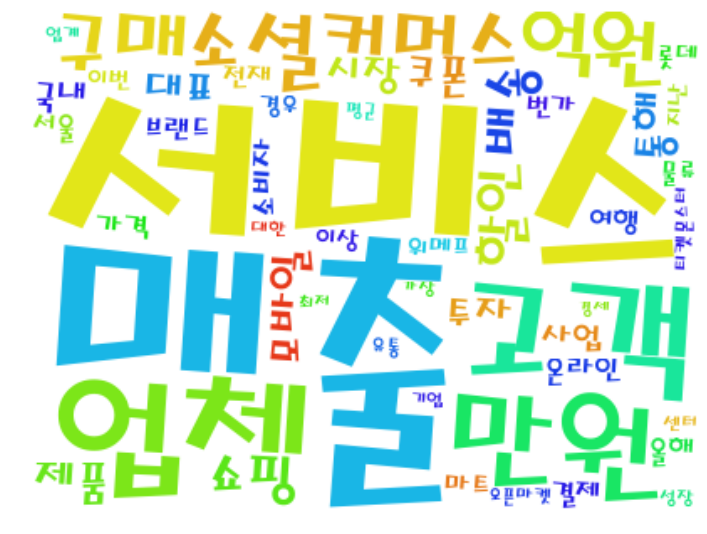

In [37]:
wc = WordCloud(font_path='C:\\Windows\\Fonts\\HMKMMAG.TTF', background_color='white', width=400, height=300)
cloud = wc.generate_from_frequencies(word_count)


pyplot.figure(figsize=(12, 9))#inch단위로 크기를 줌
pyplot.imshow(cloud)#단어를 화면에 그려라
pyplot.axis("off")#그래프의 축을 그리지 말고
pyplot.show() #화면에 뿌려라

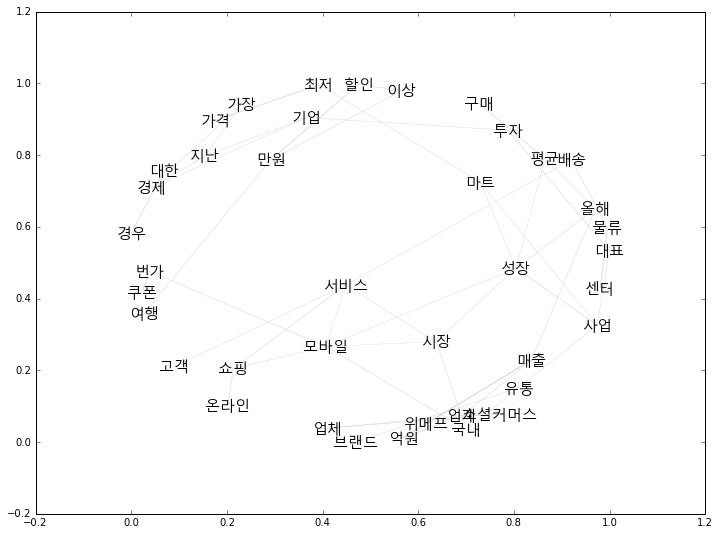

In [38]:
word_corr = numpy.corrcoef(tdf.todense(), rowvar=0)
edges = []
for i in range(len(words)):
    for j in range(i + 1, len(words)):#대각선, 대칭은 서로 값이 같으므로, 무시하면 된다. 그것을 의미함.
        edges.append((words[i], words[j], word_corr[i, j]))
        
edges = sorted(edges, key=operator.itemgetter(2), reverse=True)
edges = edges[:50]    #단어쌍중에 상관이 높은 50개만 출력함
edge_list = [(word1, word2) for word1, word2, weight in edges]#단어쌍만 새로 만듬
weight_list = [weight for word1, word2, weight in edges]#상관계수만 따로 뽑음

G = networkx.Graph()  
edge_set = set()
for word1, word2, weight in edges:
    G.add_edge(word1, word2, weight=weight)#weight = 상관계수
    edge_set.add((word1, word2))
    
position = networkx.spring_layout(G, iterations=30)
pyplot.figure(figsize=(12, 9))
networkx.draw_networkx_nodes(G, position, node_size=0)
networkx.draw_networkx_edges(G, position, edgelist=edge_list, width=weight_list, edge_color='lightgray')#상관계수가 클 수록 두껍게 그려주겠다.
labels = networkx.draw_networkx_labels(G, position, font_size=15, font_family='Malgun Gothic')

In [39]:
corpus = Sparse2Corpus(tdf.T) 
lda = LdaModel(corpus=corpus, num_topics=20, id2word=dict(enumerate(words)),iterations= 200) 

In [40]:
lda.show_topic(0)

[('할인', 0.11465373786450235),
 ('만원', 0.092051763926719918),
 ('고객', 0.085847317194523445),
 ('쇼핑', 0.061386644805384888),
 ('서비스', 0.058176627646799171),
 ('온라인', 0.036920200832797692),
 ('롯데', 0.035711198040784847),
 ('통해', 0.029992247366056081),
 ('브랜드', 0.029988772238934765),
 ('소비자', 0.029277548004649618)]

In [41]:
lda.show_topic(1)

[('서비스', 0.081142111430762678),
 ('구매', 0.065959834786984958),
 ('고객', 0.051948483803087232),
 ('브랜드', 0.051389652600073076),
 ('평균', 0.046530883429871911),
 ('매출', 0.04628033125724574),
 ('제품', 0.040647786688694162),
 ('만원', 0.030976039686023738),
 ('올해', 0.028713895078564946),
 ('쇼핑', 0.027670368449377196)]

# 쿠팡 로켓 배송 "블로그" -워드클라우드

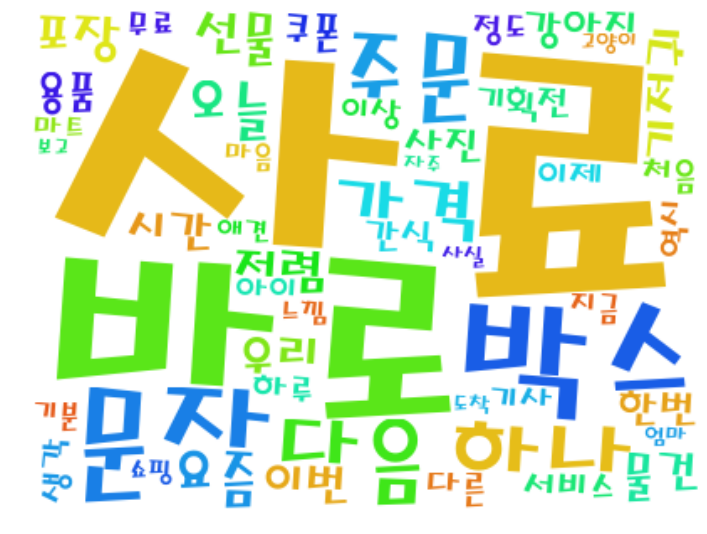

In [58]:
wc = WordCloud(font_path='C:\\Windows\\Fonts\\HMKMMAG.TTF', background_color='white', width=400, height=300)
cloud = wc.generate_from_frequencies(word_count)


pyplot.figure(figsize=(12, 9))#inch단위로 크기를 줌
pyplot.imshow(cloud)#단어를 화면에 그려라
pyplot.axis("off")#그래프의 축을 그리지 말고
pyplot.show() #화면에 뿌려라

[분석]
쿠팡의 로켓배송 급하게 구매하는 것이 강아지 사료, 강아지 간식이였다. 

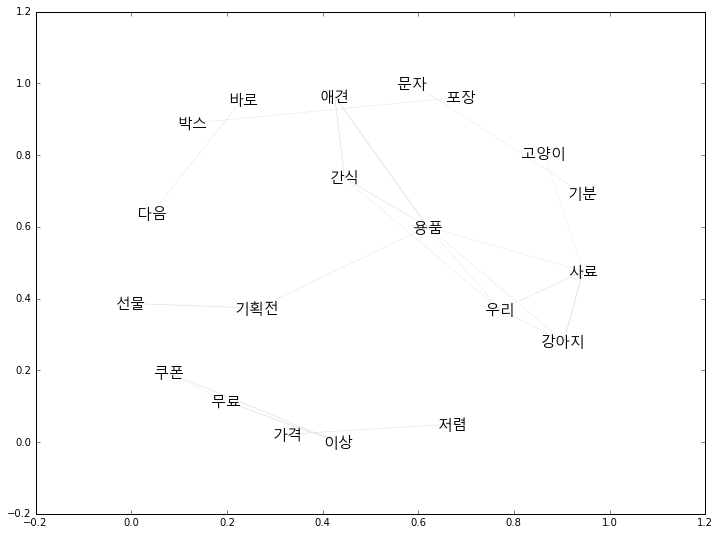

In [64]:
word_corr = numpy.corrcoef(tdf.todense(), rowvar=0)
edges = []
for i in range(len(words)):
    for j in range(i + 1, len(words)):#대각선, 대칭은 서로 값이 같으므로, 무시하면 된다. 그것을 의미함.
        edges.append((words[i], words[j], word_corr[i, j]))
        
edges = sorted(edges, key=operator.itemgetter(2), reverse=True)
edges = edges[:20]    #단어쌍중에 상관이 높은 50개만 출력함
edge_list = [(word1, word2) for word1, word2, weight in edges]#단어쌍만 새로 만듬
weight_list = [weight for word1, word2, weight in edges]#상관계수만 따로 뽑음

G = networkx.Graph()  
edge_set = set()
for word1, word2, weight in edges:
    G.add_edge(word1, word2, weight=weight)#weight = 상관계수
    edge_set.add((word1, word2))
    
position = networkx.spring_layout(G, iterations=30)
pyplot.figure(figsize=(12, 9))
networkx.draw_networkx_nodes(G, position, node_size=0)
networkx.draw_networkx_edges(G, position, edgelist=edge_list, width=weight_list, edge_color='lightgray')#상관계수가 클 수록 두껍게 그려주겠다.
labels = networkx.draw_networkx_labels(G, position, font_size=15, font_family='Malgun Gothic')

[분석]

쿠팡에서 주로 구매하는 것으로 아기 기저귀가 있었고, 로켓배송에서는 강아지 사료가 나타났다.
강아지나 아기나 집에서 '아기'로 불리우며, 소중한 존재인데 이들에겐 항상 저렴하면서도 급하게 전달이 되어야 하는것이 강아지에겐 사료이고, 아기에겐 기저귀인가 보다.